<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> An example of gradient descent in the simple case of a linear regression.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import


In [1]:
import numpy as np
import sys

from modules.RegressionCooker import RegressionCooker 

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init()


FIDLE 2020 - Practical Work Module
Version              : 0.6 DEV
Run time             : Tuesday 8 December 2020, 18:57:30
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf
Datasets dir         : /home/pjluc/datasets/fidle
Update keras cache   : False


## Step 2 - Instanciate

In [2]:
cooker = RegressionCooker()


FIDLE 2020 - Regression Cooker
Version      : 0.1
Run time     : Tuesday 8 December 2020, 18:57:30


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


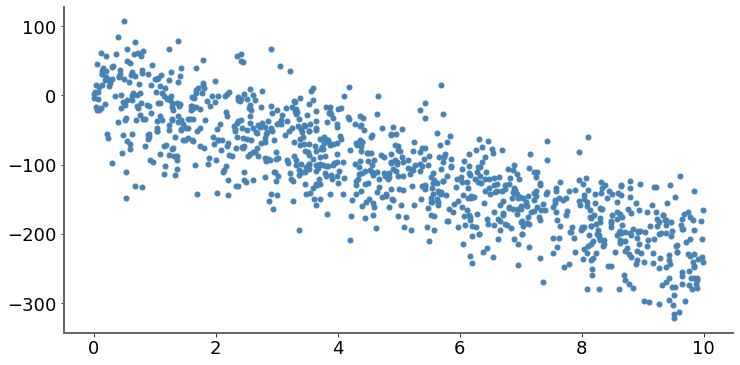

X                :      mean=   5.000  std=   2.887    min=   0.000    max=  10.000
Y                :      mean=-108.966  std=  76.215    min=-398.559    max= 164.927


In [3]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [4]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.000  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.732    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +15.437   -7.599  +1.668   -3.724  -0.017
   20   +7.049   -5.073  +1.114   -2.486  -0.288
   40   +3.310   -3.387  +0.744   -1.660  -0.470
   60   +1.644   -2.261  +0.496   -1.108  -0.591
   80   +0.901   -1.510  +0.331   -0.740  -0.672
  100   +0.570   -1.008  +0.221   -0.494  -0.726
  120   +0.423   -0.673  +0.148   -0.330  -0.762
  140   +0.357   -0.449  +0.099   -0.220  -0.786
  160   +0.328   -0.300  +0.066   -0.147  -0.802
  180   +0.315   -0.200  +0.044   -0.098  -0.813
  200   +0.309   -0.134  +0.029   -0.065  -0.820


**Visualization :**  

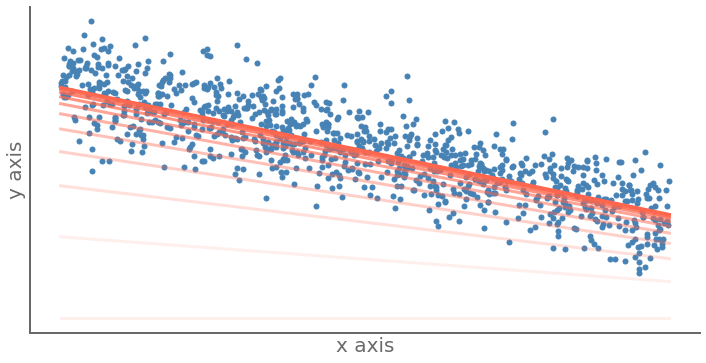

**Loss :**  

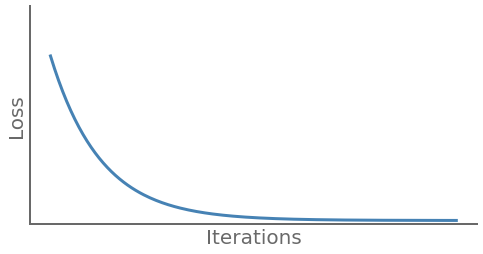

In [5]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.289   +4.880  +1.858   -0.159  -0.794
    1   +0.343   -2.225  +5.318   -0.072  -0.864
    2   +0.145   +1.396  -2.832   -0.003  -0.808
    3   +0.167   +1.158  -1.871   -0.001  -0.799
    4   +0.233   +0.524  +2.474   -0.004  -0.840
    5   +0.300   +4.279  -0.944   -0.006  -0.860
    6   +0.106   -2.039  +3.957   +0.017  -0.837
    7   +0.269   +3.529  +0.405   +0.008  -0.837
    8   +0.370   -2.608  +3.482   +0.010  -0.850
    9   +0.276   +2.300  -2.597   +0.011  -0.854


**Visualization :**  

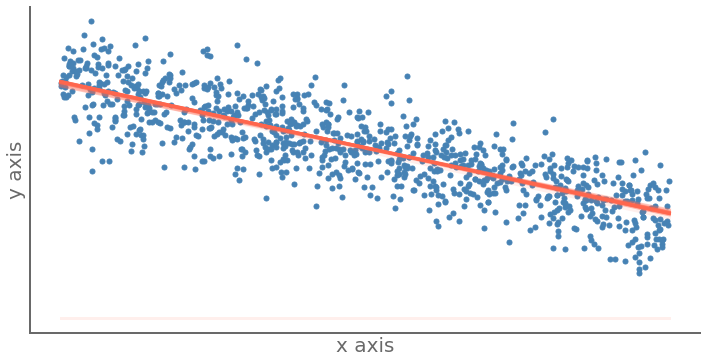

**Loss :**  

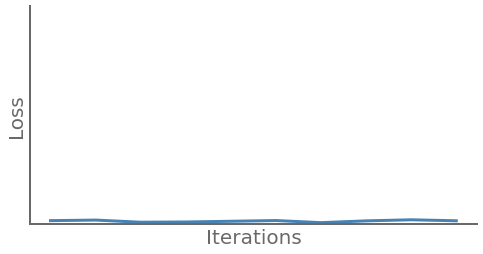

In [6]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [7]:
pwk.end()

End time is : Tuesday 8 December 2020, 18:57:34
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>